# Credit card fraud detection
## Using Decision tree & random forest classifier


In [1]:
# importing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# dataset
df = pd.read_csv('https://media.githubusercontent.com/media/akshaykanehitlu/Credit-Card-Fraud-Detection-ML/main/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

_For all those columns , 'Class' is our target_

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

As seen above, this dataset is **imbalanced**, therefore beteer to use _StratifiedKFold_

<AxesSubplot:>

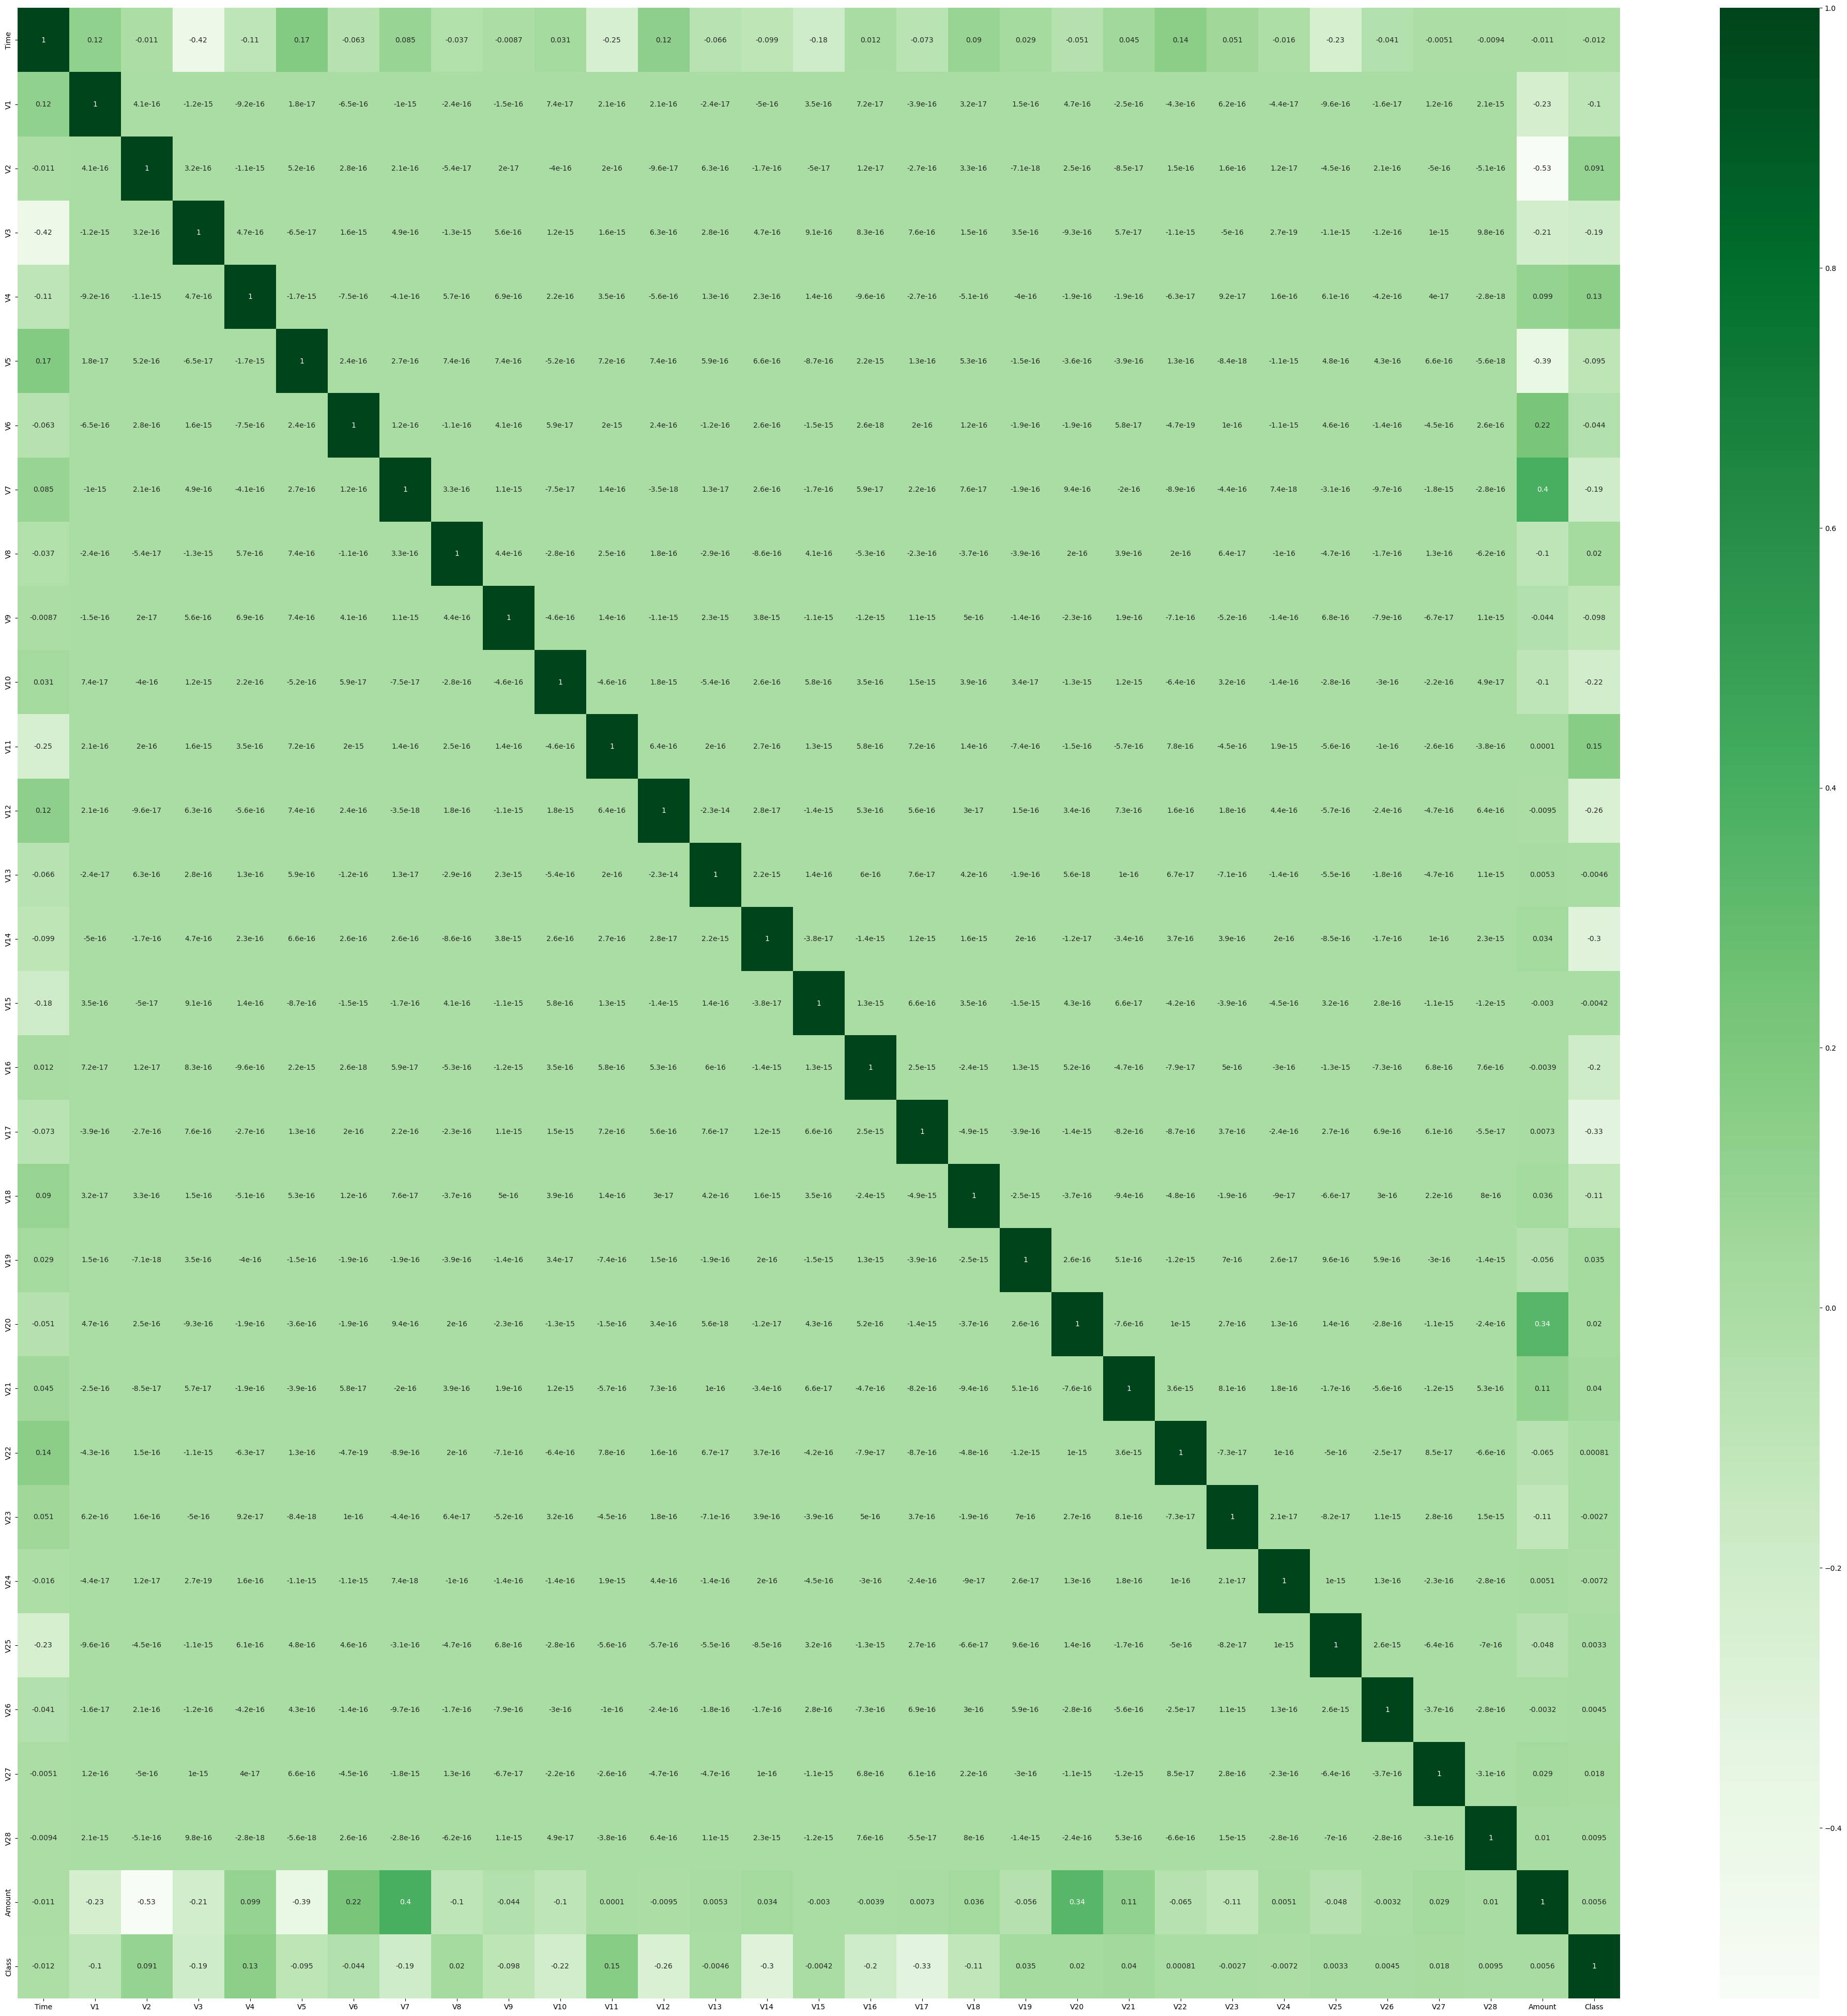

In [8]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, cmap='Greens')  # visualize the correltaion

Out of the 30 columns, we shall pick the top 20 with the highest correlation

In [9]:
# Feature importance/selection
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [10]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [11]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [12]:
model = ExtraTreesClassifier()

In [13]:
model.fit(x, y)

ExtraTreesClassifier()

In [14]:
model.feature_importances_

array([0.0149525 , 0.01284937, 0.01484568, 0.03690691, 0.03564219,
       0.01341578, 0.01298399, 0.0243165 , 0.01501316, 0.034087  ,
       0.06558028, 0.07425409, 0.10399874, 0.01034053, 0.12620303,
       0.01278352, 0.06647093, 0.13710057, 0.04634125, 0.0151914 ,
       0.01453087, 0.015522  , 0.01259332, 0.00897052, 0.01093727,
       0.01070003, 0.01517053, 0.01377633, 0.01239885, 0.01212284])

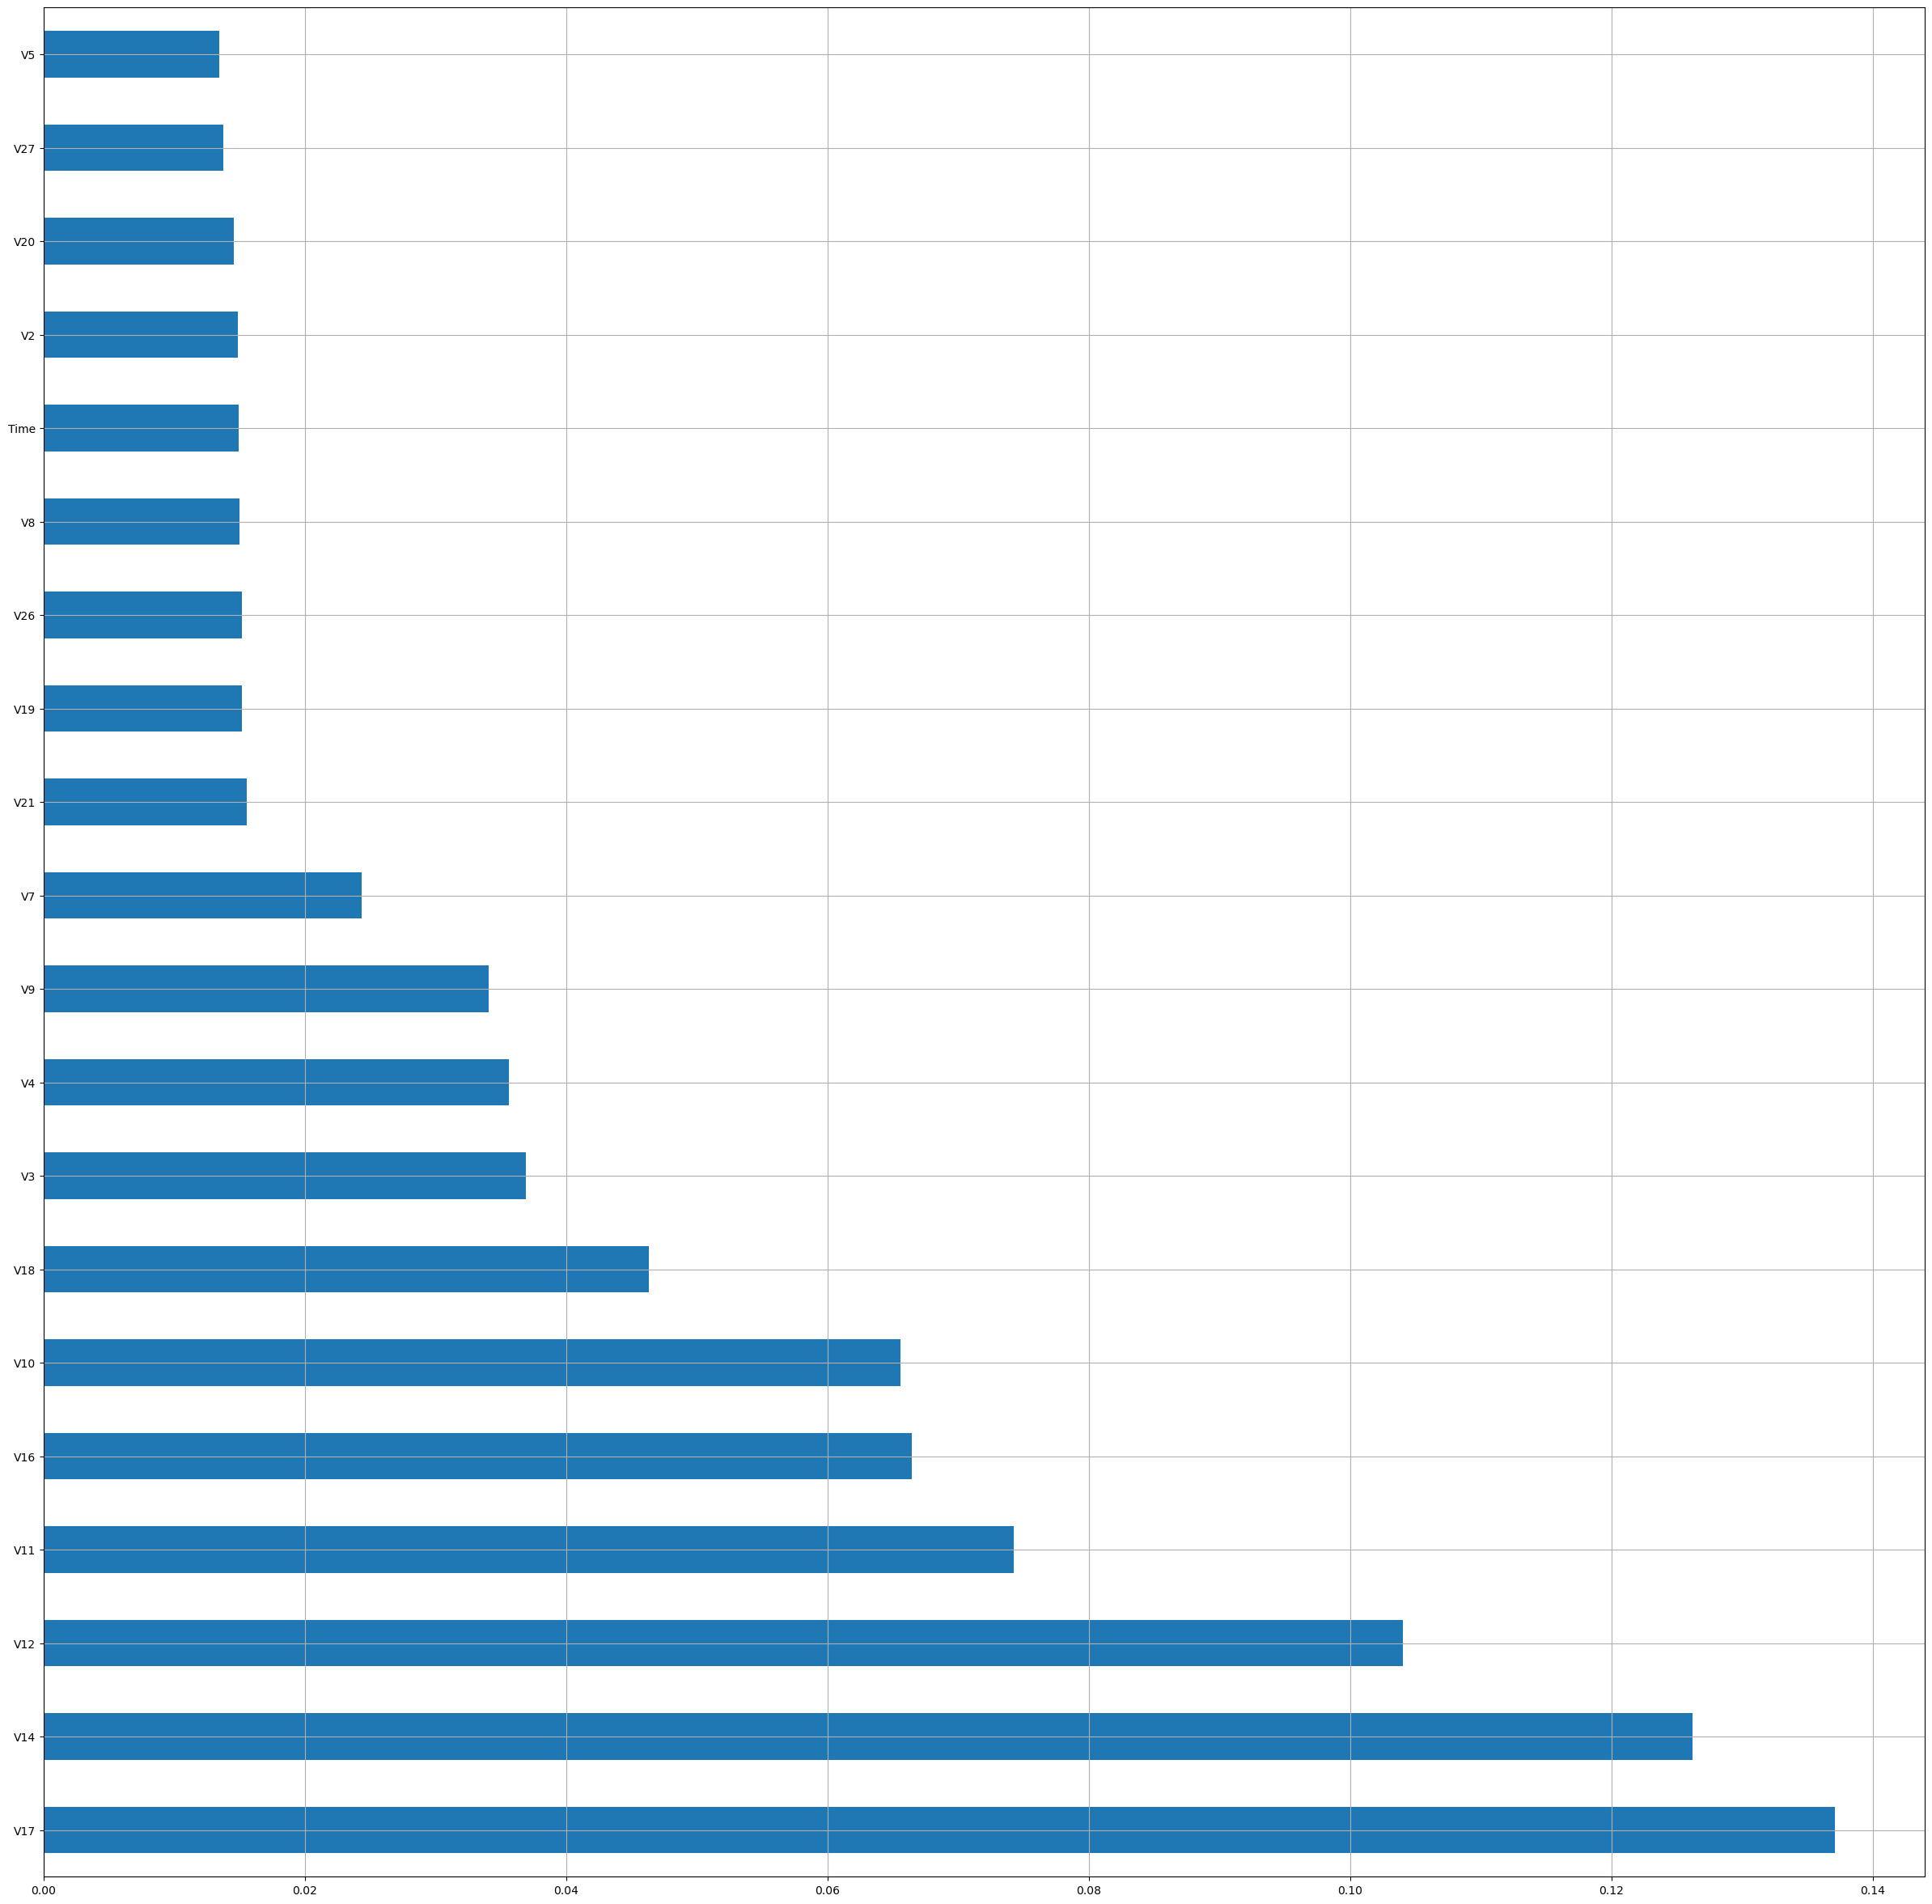

In [15]:
plt.figure(figsize=(30, 30))
feat = pd.Series(model.feature_importances_, index=x.columns)
feat.nlargest(20).plot(kind='barh')
plt.grid()

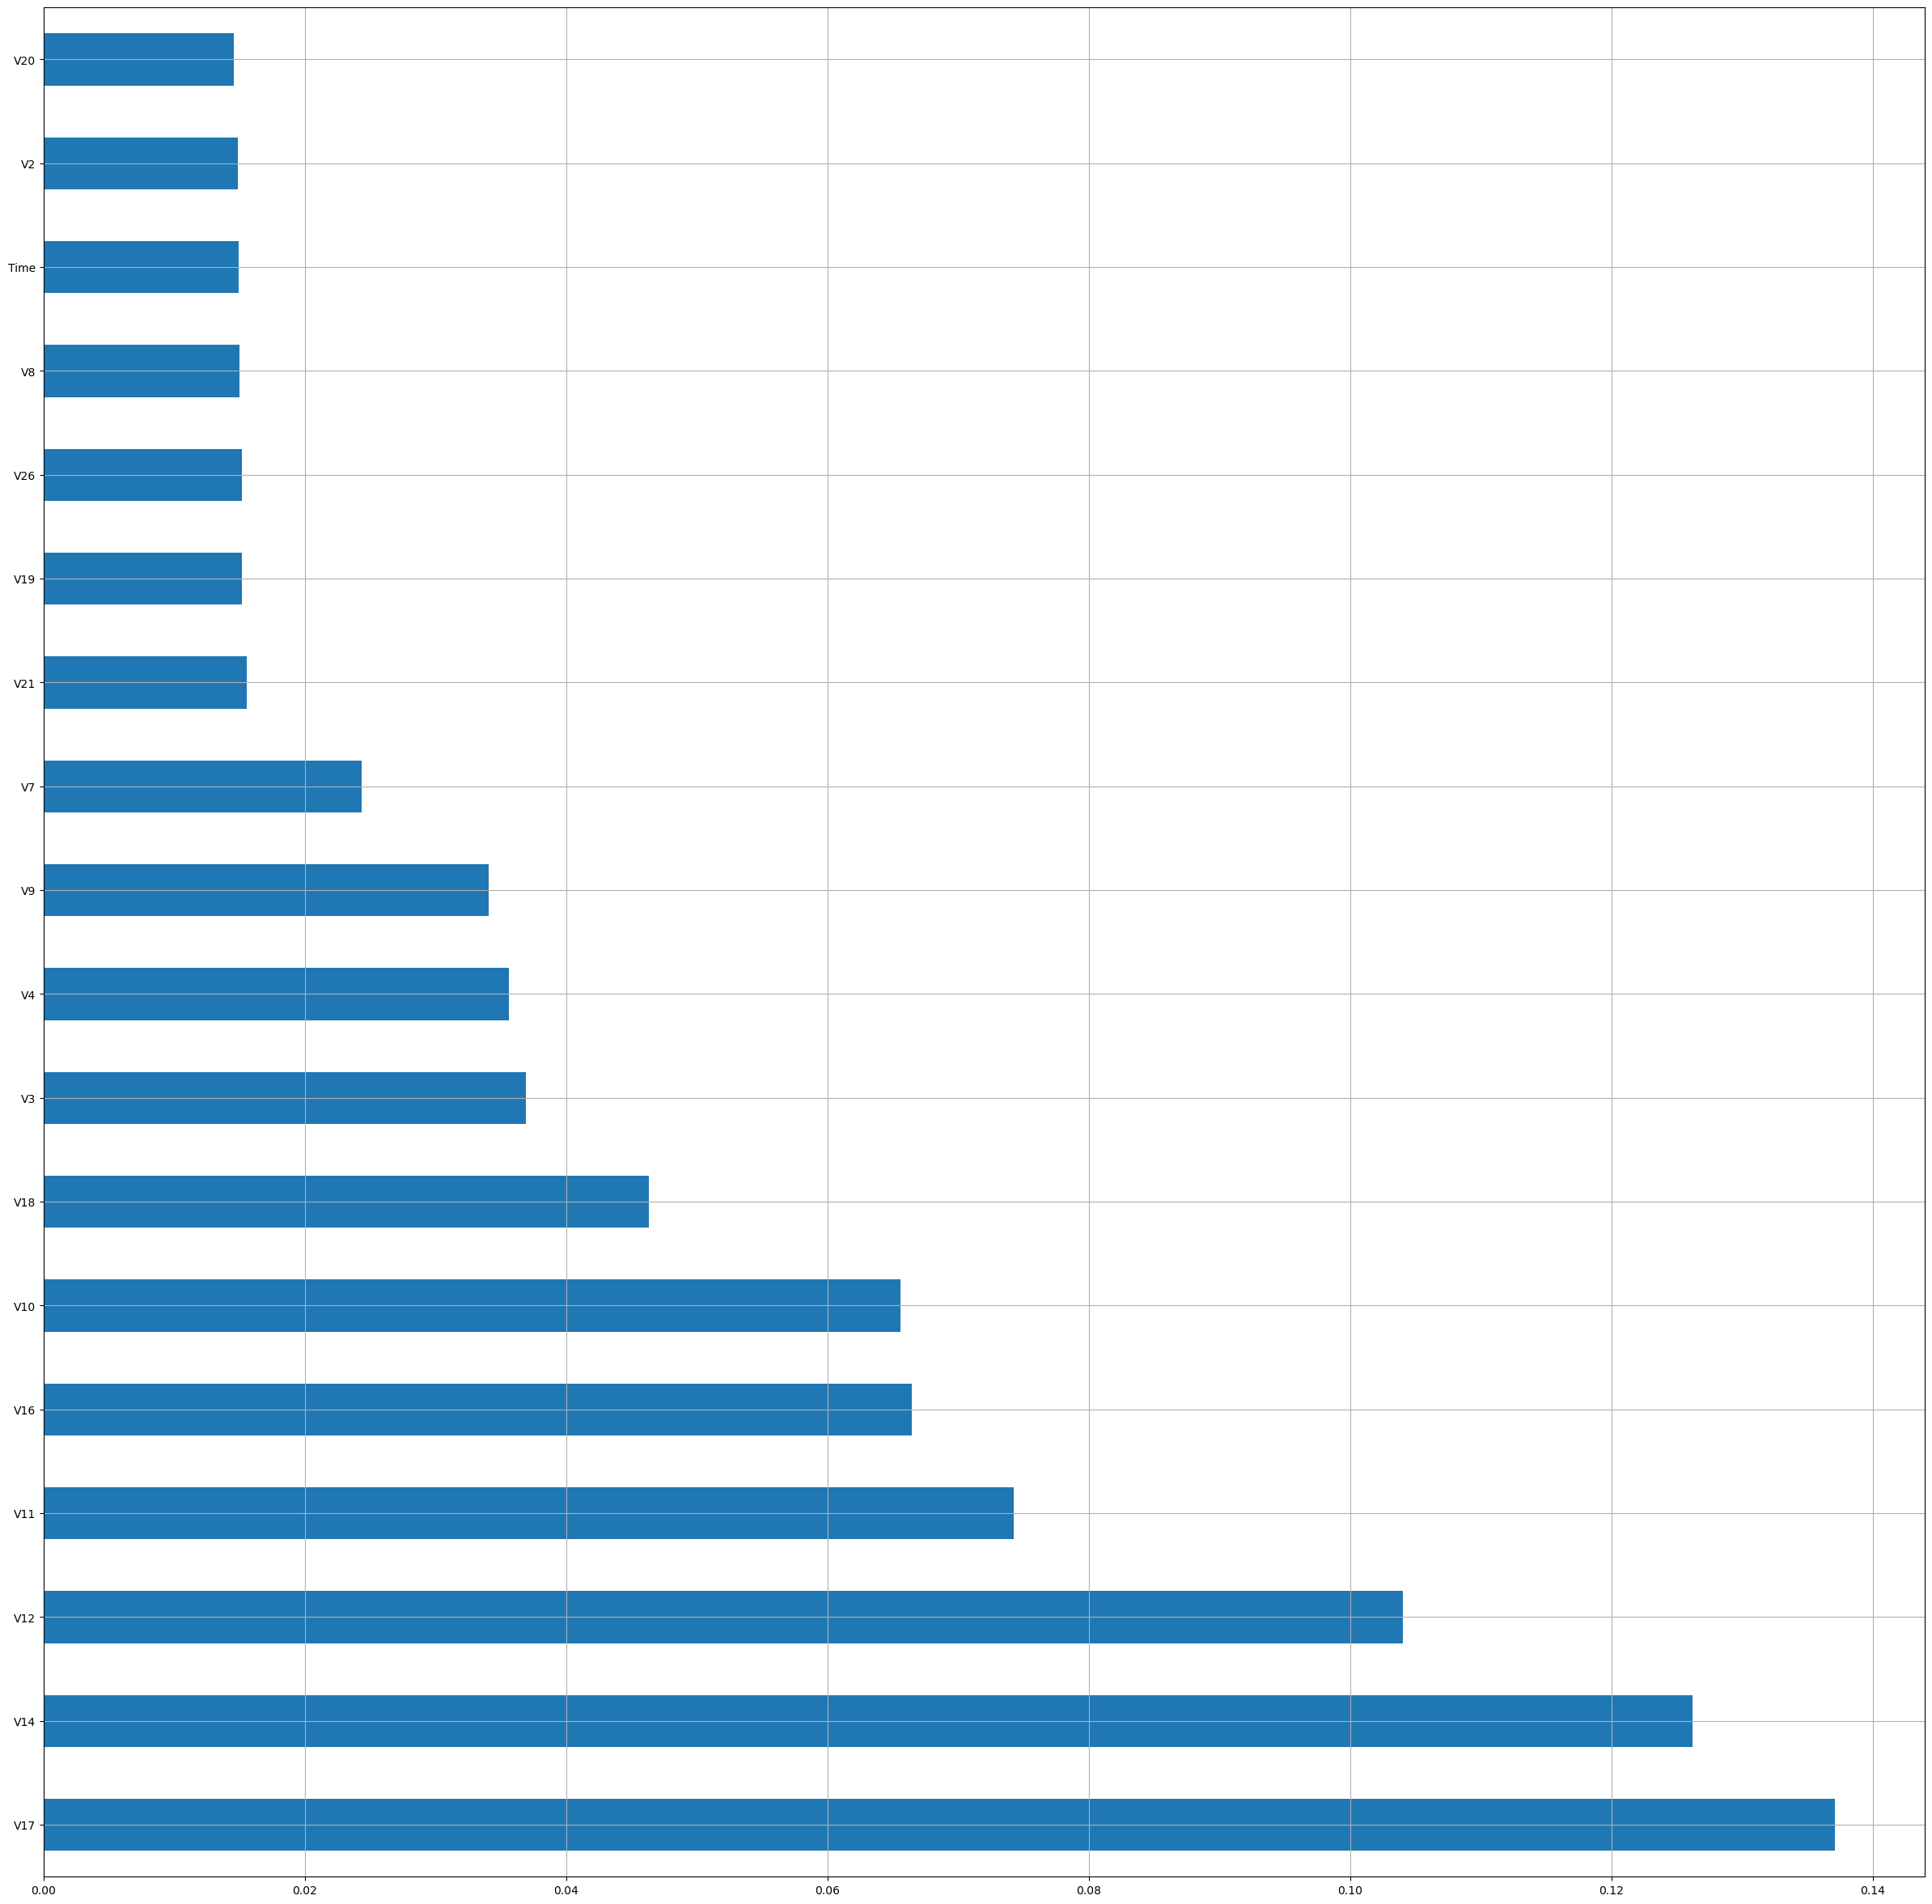

In [16]:
plt.figure(figsize=(30, 30))
feat = pd.Series(model.feature_importances_, index=x.columns)
feat.nlargest(18).plot(kind='barh')
plt.grid()

In [17]:
feat = pd.Series(model.feature_importances_, index=x.columns)
plots = feat.nlargest(18)

In [18]:
plots.index

Index(['V17', 'V14', 'V12', 'V11', 'V16', 'V10', 'V18', 'V3', 'V4', 'V9', 'V7',
       'V21', 'V19', 'V26', 'V8', 'Time', 'V2', 'V20'],
      dtype='object')

In [19]:
feat_cols = ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V9', 'V18', 'V4', 'V3', 'V7',
       'V21', 'Time', 'V8', 'V19', 'V26', 'V2', 'V20']
x_new = x[feat_cols]

In [20]:
x_new.columns

Index(['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V9', 'V18', 'V4', 'V3', 'V7',
       'V21', 'Time', 'V8', 'V19', 'V26', 'V2', 'V20'],
      dtype='object')

In [21]:
x_new.head()

,V17,V14,V12,V10,V11,V16,V9,V18,V4,V3,V7,V21,Time,V8,V19,V26,V2,V20
0,0.207971,-0.311169,-0.617801,0.090794,-0.551600,-0.470401,0.363787,0.025791,1.378155,2.536347,0.239599,-0.018307,0.0,0.098698,0.403993,-0.189115,-0.072781,0.251412
1,-0.114805,-0.143772,1.065235,-0.166974,1.612727,0.463917,-0.255425,-0.183361,0.448154,0.166480,-0.078803,-0.225775,0.0,0.085102,-0.145783,0.125895,0.266151,-0.069083
2,1.109969,-0.165946,0.066084,0.207643,0.624501,-2.890083,-1.514654,-0.121359,0.379780,1.773209,0.791461,0.247998,1.0,0.247676,-2.261857,-0.139097,-1.340163,0.524980
3,-0.684093,-0.287924,0.178228,-0.054952,-0.226487,-1.059647,-1.387024,1.965775,-0.863291,1.792993,0.237609,-0.108300,1.0,0.377436,-1.232622,-0.221929,-0.185226,-0.208038
4,-0.237033,-1.119670,0.538196,0.753074,-0.822843,-0.451449,0.817739,-0.038195,0.403034,1.548718,0.592941,-0.009431,2.0,-0.270533,0.803487,0.502292,0.877737,0.408542


In [22]:
x.shape

(284807, 30)

In [23]:
x_new.shape

(284807, 18)

In [24]:
# splitting the data
skf = StratifiedKFold(n_splits=10)

In [25]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [26]:
for train_index, test_index in skf.split(x_new, y):
    x_new_train, x_new_test = x_new.iloc[train_index], x_new.iloc[test_index]
    y_new_train, y_new_test = y.iloc[train_index], y.iloc[test_index]

In [27]:
x_train.shape

(256327, 30)

In [28]:
x_new_train.shape

(256327, 18)

In [29]:
# Model selection
decision = DecisionTreeClassifier()
randomf = RandomForestClassifier()

In [30]:
# Hyper-parameter tuning for random forest
# commented for now
# n_estimators = [int(i) for i in np.linspace(100, 1200, 12)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(i) for i in np.linspace(5, 30, 5)]
# min_samples_split = [2,5, 10, 15,100]
# min_samples_leaf = [1, 2, 5, 10]

In [31]:
# parameters = {
#     'n_estimators': n_estimators,
#     'max_features': max_features,
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf
# }

In [32]:
# parameters

In [33]:
# rf_model = RandomizedSearchCV(estimator=randomf,
#                              param_distributions=parameters,
#                              scoring='neg_mean_squared_error',
#                              n_jobs=1,
#                              cv=5,
#                              verbose=2,
#                              random_state=42)

In [34]:
randomf.fit(x_train, y_train) 

KeyboardInterrupt: 

In [ ]:
# rf_model.fit(x_train, y_train)  # to do with hyperparameter tuning, do run this instead

### There are  ways to tackle imbalanced datasets
- **Undersampling**: just use a sample of the majority class, so that majority class reduces in size to be as minority BUt here we are reducing the size of our data
- **Oversampling**: make copies from minority class, to increase minority class to be same as majority class BUT here we are adding redundacy
- **Near miss**

In [ ]:
# AutoML with Lazypredict
# !pip install lazypredict

In [ ]:
# from lazypredict.Supervised import LazyClassifier 

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(x_train, x_test, y_train, y_test)

In [ ]:
# other ways to do AutoML
# !pip install auto-sklearn  #then use auto-sklearn instead

In [ ]:
y_pred = randomf.predict(x_test)

In [ ]:
# havent solved the imbalanced problem
accuracy_score(y_test, y_pred)  # would show quite a high accuracy 